In [7]:
!conda install -c conda-forge mlxtend --yes
!conda install seaborn --yes

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: - 

In [1]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df con duplicados
#dfc = pd.read_csv('datasets/eHRs-gen2-aggregated-1y.csv', encoding='latin1',usecols=[0,1,2,3])
dfc = pd.read_csv('datasets/eHRs-gen2-aggregated-1y.csv', encoding='latin1')

In [ ]:
dfc.shape
#2 millones 100mil

(2100990, 91)

In [3]:
df = dfc.drop_duplicates(subset="p_id")
df.shape
#860 mil

(860983, 93)

In [22]:
df.age.max()
bins = range(0, df['v_o_id'].max() + 15, 15)
bins

range(0, 32, 15)

In [4]:
dfc['v_o_id']= dfc['v_o_id'].astype(str).str.split('_').str.get(1).astype(int)
df['v_o_id']= df['v_o_id'].astype(str).str.split('_').str.get(1).astype(int)

/tmp/ipykernel_9685/2746081674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v_o_id']= df['v_o_id'].astype(str).str.split('_').str.get(1).astype(int)


In [6]:
df3 = dfc.iloc[:,4:]
df3 = df3.fillna(0)

# EDA por visita

In [57]:
df.columns

Index(['p_id', 'age', 'v_o_id', 'sex', 'F40-F41', 'I20-I25', 'E10-E14',
       'I10-I15', 'E78', 'F17', 'J45', 'F20', 'M15-M19', 'I50', 'N18', 'E66',
       'K76.0', 'I34-I38', 'C55', 'H35', 'E03', 'G80-G83', 'F09', 'M10', 'M13',
       'G20', 'L40', 'I71', 'I48', 'G25', 'F10', 'K90.4', 'F01-F03', 'N20',
       'F50', 'I60-I64', 'K21', 'J44', 'F48', 'G45', 'C61', 'F70-F79', 'I69',
       'K73', 'I70', 'F30-F39', 'C34', 'I65', 'C25', 'M81', 'H40-H42', 'C50',
       'K50-K51', 'M79.7', 'C18-C20', 'C67', 'F90-F98', 'L20', 'M05-M06',
       'C88', 'K74', 'C81', 'M30-M31', 'C64-C65', 'F60-F69', 'C22', 'G40-G41',
       'Q20-Q28', 'I74', 'I67-I69', 'C82-C85', 'C56', 'C14', 'H35.3', 'B20',
       'C16', 'F19', 'F89', 'C43', 'F84', 'C62', 'C91-C95', 'C53', 'C46',
       'C73', 'C40-C41', 'Z89', 'pred1y_I20-I25', 'pred1y_H35', 'pred1y_N18',
       'pred1y_Z89', 'age_group'],
      dtype='object')

[0.5038519924319064, 0.4504072670424387, 0.04574074052565498]


([<matplotlib.patches.Wedge at 0x7faeb79d70a0>,
 [Text(-0.013311265265506796, 1.0999194562407884, 'M'),
  Text(-0.14433955168050241, -1.0904889242081608, 'F'),
  Text(1.0886624114823256, -0.1575250895111246, 'N')],
 [Text(-0.007260690144821888, 0.5999560670404299, '50.4%'),
  Text(-0.07873066455300132, -0.5948121404771786, '45.0%'),
  Text(0.5938158608085411, -0.08592277609697704, '4.6%')])

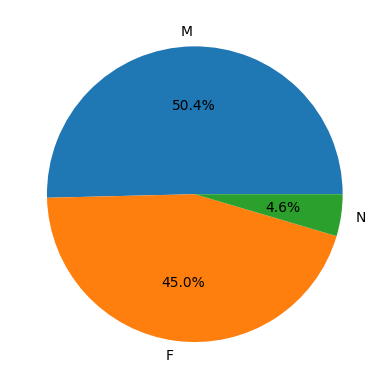

In [7]:
sex_percent = list(df.sex.value_counts(normalize=True))
print(sex_percent)
plt.pie(sex_percent, labels=['M','F','N'], autopct='%1.1f%%')


[0.0354013958463756, 0.03375792553395363, 0.03165800021603214, 0.0314698431908644, 0.031215482767952444, 0.030717215090193418, 0.030374583470289193, 0.030194556686949686, 0.030136483531033712, 0.029583627086713676, 0.028891395068195307, 0.02802494358192903, 0.02786466167160095, 0.026530140548651947, 0.026066716764442503, 0.024767039535043084, 0.022960964386056402, 0.02153236475052353, 0.021368598450840492, 0.021208316540512414, 0.020401099673280423, 0.020144416324131834, 0.01999458758186863, 0.019706544728525417, 0.018984114668930744, 0.017805229603836546, 0.016872574719826058, 0.016245384635933578, 0.015987539823666668, 0.01529763073138494, 0.015244203427942247, 0.014896925955564744, 0.014583330913618504, 0.014046734952954937, 0.012749380649792157, 0.012121029102781357, 0.012079216430521856, 0.01146596390404921, 0.010749341160046133, 0.010565829987351666, 0.009638982418932778, 0.009254538126769053, 0.007422910789179345, 0.007385743969393124, 0.0062335725560202695, 0.005831706317081754

([<matplotlib.patches.Wedge at 0x7faebb2b8bb0>,
 [Text(1.0932039649161367, 0.12208640830018087, ''),
  Text(1.0411846138596157, 0.3548726530207744, ''),
  Text(0.9468572800365775, 0.559876139196639, ''),
  Text(0.8179882028022817, 0.7354558450894884, ''),
  Text(0.6582774545591885, 0.8812892787383015, ''),
  Text(0.47546641504213, 0.9919333083262126, ''),
  Text(0.27752551954121457, 1.0644151379999154, ''),
  Text(0.07119568096398314, 1.0976935706343893, ''),
  Text(-0.13688785046873447, 1.0914493650161008, ''),
  Text(-0.3380601427376445, 1.0467642236397858, ''),
  Text(-0.523587616063965, 0.9673965103846789, ''),
  Text(-0.6872976787549044, 0.8588491723103192, ''),
  Text(-0.8267556119157055, 0.7255860790877177, ''),
  Text(-0.938103593323503, 0.5744228827210245, ''),
  Text(-1.0198110249529613, 0.4122929460764404, ''),
  Text(-1.0723973762867007, 0.2448752076740326, ''),
  Text(-1.096944450292203, 0.08193212418299103, ''),
  Text(-1.0976608110583141, -0.07169898093281363, ''),
  Tex

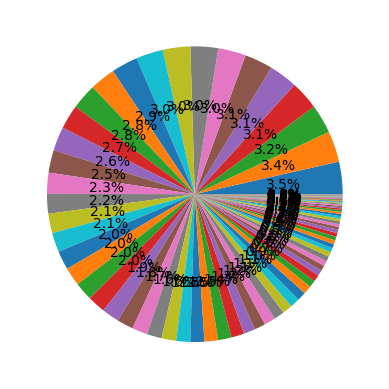

In [8]:
age_percent = list(df.age.value_counts(normalize=True))
print(age_percent)
plt.pie(age_percent, autopct='%1.1f%%')

In [8]:
#df[df.].duplicated().value_counts()
df['v_o_id']= df['v_o_id'].astype(str).str.split('_').str.get(1).astype(int)
df['v_o_id'].value_counts()

/tmp/ipykernel_5245/2042298879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v_o_id']= df['v_o_id'].astype(str).str.split('_').str.get(1).astype(int)


v_o_id
1     318979
2     287336
3     160216
4      63233
5      21243
6       6756
7       2159
8        661
9        367
10        12
12         6
11         4
17         3
13         3
15         2
14         2
0          1
Name: count, dtype: int64

In [93]:
#df['v_o_id'] = df['v_o_id'].astype(int)
#df['bloque1_visitas'] = df['v_o_id'] <=10
#df['bloque2_visitas'] = df['v_o_id'] >=10
bloque1_visitas= df[(df['v_o_id'] >1) & (df['v_o_id'] <=10)]
bloque1_visitas

,p_id,age,v_o_id,sex
1,0,71,3,U
2,0,73,6,U
3,0,78,9,U
4,0,81,10,U
6,1,76,2,M
...,...,...,...,...
2100965,999884,71,3,M
2100969,999891,90,2,F
2100970,999892,54,2,F
2100972,999893,57,2,F


In [80]:
b1v = bloque1_visitas.groupby(['sex','v_o_id']).count().unstack()
#rb1v = b1v.div(bloque1_visitas.groupby(['sex','v_o_id']).count()/100,axis=0)
b1v

age                                                          
v_o_id      2       3       4       5      6      7      8      9     10
sex                                                                     
F       174478  169461  140808  105493  75838  53727  36613  29009  9870
M       203804  200109  159572  113505  77576  51013  32314  23513  7880
U        17280   16568   13372   10234   7794   5768   4147   3442  1234

In [91]:
rb1v = b1v/ b1v.sum().sum()*100
rb1v

age                                                     \
v_o_id         2          3         4         5         6         7    
sex                                                                    
F       10.002052   9.714450  8.071900  6.047447  4.347457  3.079931   
M       11.683182  11.471364  9.147557  6.506740  4.447089  2.924350   
U        0.990586   0.949770  0.766558  0.586670  0.446796  0.330654   

                                      
v_o_id        8         9         10  
sex                                   
F       2.098861  1.662958  0.565803  
M       1.852419  1.347896  0.451726  
U       0.237729  0.197315  0.070740

<Axes: title={'center': 'Age distri'}, xlabel='sex'>

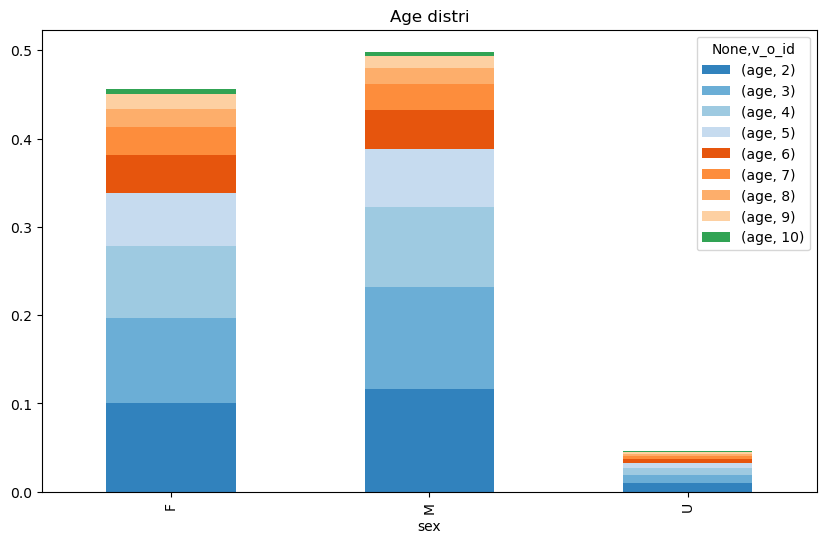

In [88]:
rb1v.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6),color=plt.get_cmap('tab20c').colors)

<Axes: title={'center': 'Age distri'}, xlabel='sex'>

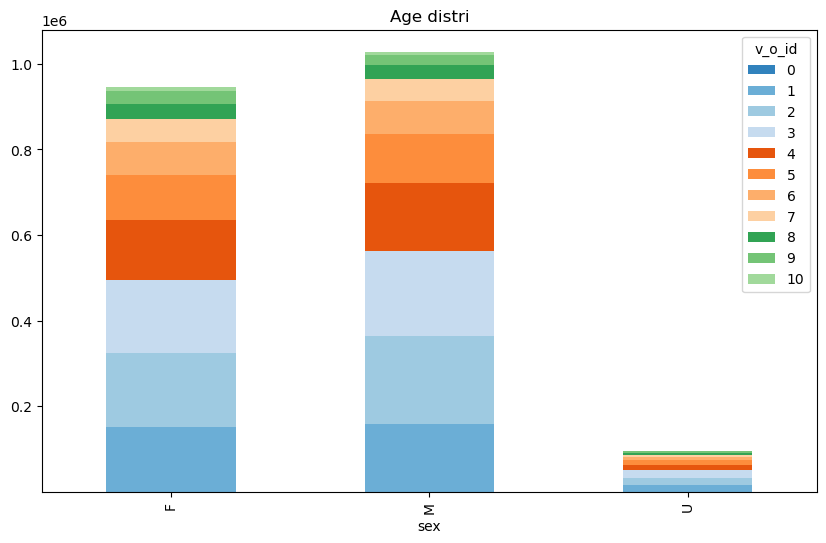

In [60]:
b1v.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6),color=plt.get_cmap('tab20c').colors)

# EDA sin duplicados (edad - sexo)


In [9]:
#df.head(4)
#df.age.plot(kind='hist', bins=20)
bins = range(0, df['age'].max() + 15, 15)
labels = [f'{i}-{i+15}' for i in bins[:-1]]
s1 = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# counts = df.groupby(s1)["sex"].size()
counts = df.groupby(s1)["sex"].value_counts().unstack()
counts
#counts.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))
#s_num = df.sex.replace({'M':0, 'F':1 , 'U':2})
#s2= pd.cut(s_num, bins=bins, labels=labels, right=False)
#s1
#df2 = pd.DataFrame({'age': s1, 'sex': s2});df2
#g= df2.groupby(["s2","s1"]).size()
#g
#df['age_group']= df['age_group'] /df['age_group'].sum()*100
#gr2 = df.groupby(['age_group']).size().unstack()
#df['age_group']
#gr2.plot(kind='bar', title='Age distri',)
#gr2

#obesidad infantil
#índice de masa corporal >30 diabetes infantil español
# rangos 20 a 25 
#sic sist info crónica de 15 en 15

sex,F,M,U
age,,,
0-15,2487,3380,523
15-30,9683,5595,754
30-45,39094,48244,4276
45-60,108890,141951,9823
60-75,152505,170018,17164
75-90,72583,63755,6709
90-105,2546,860,133
105-120,5,5,0


In [ ]:
count

<Axes: title={'center': 'Age distri'}, xlabel='age'>

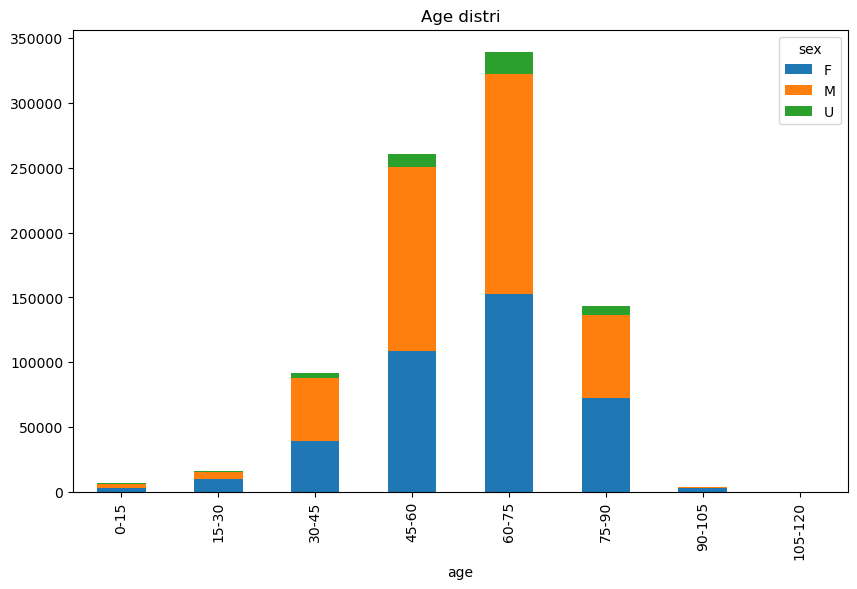

In [103]:
dfc = counts.reset_index()
counts.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))


In [104]:
relative_counts1 = counts.div(df.groupby(s1)["sex"].count()/100, axis=0)
relative_counts1


C:\Users\HP\AppData\Local\Temp\ipykernel_12500\591876316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_counts1 = counts.div(df.groupby(s1)["sex"].count()/100, axis=0)


sex,F,M,U
age,,,
0-15,38.920188,52.895149,8.184664
15-30,60.397954,34.898952,4.703094
30-45,42.672517,52.660074,4.667409
45-60,41.774085,54.457462,3.768453
60-75,44.895742,50.051371,5.052887
75-90,50.740666,44.569267,4.690067
90-105,71.941226,24.300650,3.758124
105-120,50.000000,50.000000,0.000000


<Axes: title={'center': ' Relative Age distri'}, xlabel='age'>

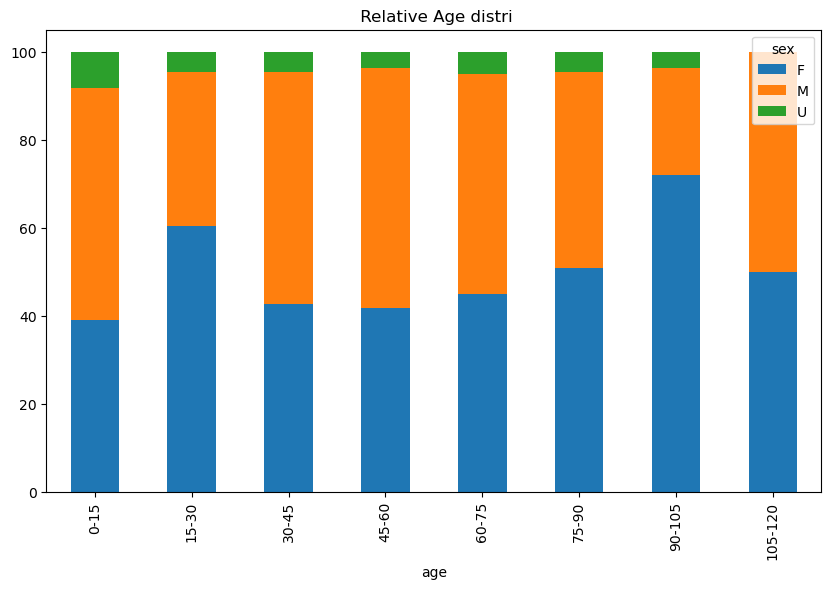

In [105]:
relative_counts1.plot(kind='bar', stacked=True, title=' Relative Age distri', figsize=(10, 6))

In [106]:
#relative_counts2 = counts.div(df.groupby(s1)["sex"].count(), axis=1)
relative_counts2 = counts.div(counts.sum(axis=0), axis=1).T
relative_counts2

age,0-15,15-30,30-45,45-60,60-75,75-90,90-105,105-120
sex,,,,,,,,
F,0.006413,0.024970,0.100812,0.280794,0.393264,0.187169,0.006565,0.000013
M,0.007791,0.012897,0.111210,0.327221,0.391920,0.146966,0.001982,0.000012
U,0.013280,0.019146,0.108578,0.249429,0.435834,0.170357,0.003377,0.000000


<Axes: title={'center': 'Age distri'}, xlabel='sex'>

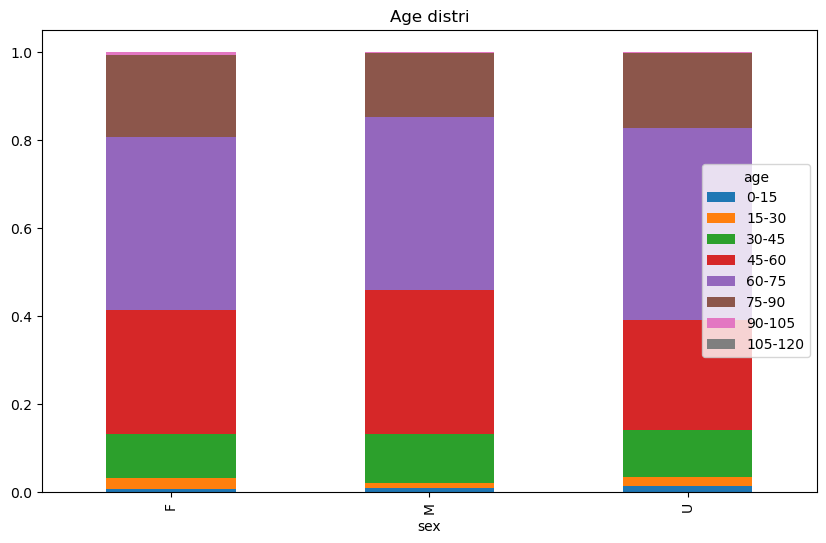

In [107]:
relative_counts2.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))

In [117]:
#df.columns[4:]
df3 = df.iloc[:,4:]
df3
#df3 = df3.fillna(0)


""
0
5
11
15
21
...
2100985
2100986
2100987
2100988


# EDA sin dupli (visitas)

### visitas de 1 a max 3

In [28]:
bins = range(0, df['age'].max() + 15, 15)
labels = [f'{i}-{i+15}' for i in bins[:-1]]

# counts = df.groupby(s1)["sex"].size()


v = df[(df['v_o_id']>0) & (df['v_o_id'] <=3)]
s1 = pd.cut(v['age'], bins=bins, labels=labels, right=False)
counts = df.groupby(s1)["sex"].value_counts().unstack()
counts

sex,F,M,U
age,,,
0-15,2427,3264,510
15-30,9157,5258,712
30-45,33866,43738,3894
45-60,97622,129521,8876
60-75,137249,151649,15330
75-90,61543,53396,5563
90-105,2206,628,112
105-120,5,5,0


In [29]:
counts.div(counts.sum(axis=1),axis=0)

sex,F,M,U
age,,,
0-15,0.391388,0.526367,0.082245
15-30,0.605341,0.347590,0.047068
30-45,0.415544,0.536676,0.047780
45-60,0.413619,0.548774,0.037607
60-75,0.451139,0.498472,0.050390
75-90,0.510722,0.443113,0.046165
90-105,0.748812,0.213170,0.038018
105-120,0.500000,0.500000,0.000000


<Axes: title={'center': 'age distri'}, xlabel='age'>

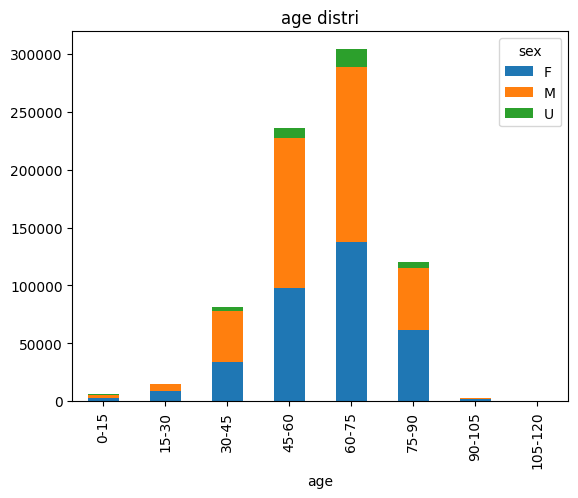

In [30]:
counts.plot(kind='bar', stacked=True, title= 'age distri',)

In [31]:
counts.div(counts.sum(axis=0),axis=1)

sex,F,M,U
age,,,
0-15,0.007054,0.008424,0.014573
15-30,0.026613,0.013570,0.020345
30-45,0.098426,0.112884,0.111267
45-60,0.283723,0.334283,0.253622
60-75,0.398893,0.391394,0.438038
75-90,0.178865,0.137811,0.158956
90-105,0.006411,0.001621,0.003200
105-120,0.000015,0.000013,0.000000


<Axes: title={'center': 'age distri'}, xlabel='sex'>

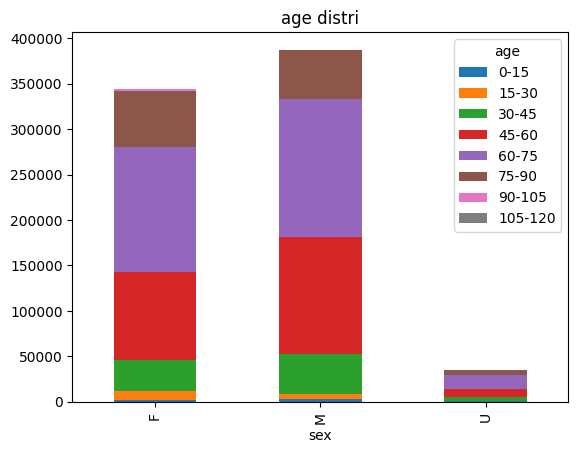

In [32]:
counts.T.plot(kind='bar', stacked=True, title= 'age distri',)

In [7]:


v2 = df[df['v_o_id']>10]
s2 = pd.cut(v2['age'], bins=bins, labels=labels, right=False)
counts2 = df.groupby(s2)["sex"].value_counts().unstack()
counts2

sex,F,M,U
age,,,
0-15,0,0,0
15-30,1,0,0


# Apriori sin duplicados

In [126]:
df3 = df.iloc[:,4:]
df3 = df3.fillna(0)
A = apriori(df3, min_support=0.5,use_colnames=True);A

In [128]:
apriori(df3, min_support=0.3,use_colnames=True)

c:\Users\HP\miniconda3\envs\ds\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.430122,(E10-E14)
1,0.317243,(I10-I15)


In [129]:
A2 = apriori(df3, min_support=0.1,use_colnames=True);A2.sort_values("support",ascending=False)

c:\Users\HP\miniconda3\envs\ds\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.430122,(E10-E14)
1,0.317243,(I10-I15)
2,0.199436,(E78)
3,0.143381,(M15-M19)
4,0.104576,"(E10-E14, I10-I15)"


In [130]:
rules = association_rules(A2,min_threshold=.4); 
rules =rules.sort_values("lift",ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [122]:
rules.sort_values(by=["antecedent support","consequents"],ascending=[False,False])


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(E10-E14),(I10-I15),0.601853,0.488669,0.304986,0.506745,1.036990,0.010879,1.036646,0.089591
5,(I10-I15),(E10-E14),0.488669,0.601853,0.304986,0.624116,1.036990,0.010879,1.059227,0.069760
6,(E78),(E10-E14),0.367579,0.601853,0.233307,0.634712,1.054595,0.012078,1.089951,0.081858
8,(E78),(I10-I15),0.367579,0.488669,0.194623,0.529471,1.083496,0.014998,1.086715,0.121852
7,(M15-M19),(E10-E14),0.312242,0.601853,0.199518,0.638986,1.061698,0.011595,1.102858,0.084495
10,(M15-M19),(E78),0.312242,0.367579,0.135838,0.435041,1.183529,0.021064,1.119409,0.225471
9,(M15-M19),(I10-I15),0.312242,0.488669,0.173770,0.556522,1.138853,0.021187,1.153002,0.177276
13,"(E10-E14, I10-I15)",(E78),0.304986,0.367579,0.136389,0.447196,1.216598,0.024282,1.144023,0.256161
16,"(E10-E14, I10-I15)",(M15-M19),0.304986,0.312242,0.122145,0.400494,1.282642,0.026916,1.147209,0.317057
11,"(E78, E10-E14)",(I10-I15),0.233307,0.488669,0.136389,0.584589,1.196288,0.022379,1.230904,0.214011


# A visi1-2

In [10]:
v12 = dfc[(dfc['v_o_id']>0) & (dfc['v_o_id'] <=2)]

v12 = v12.iloc[:,4:-1]
v12 = v12.fillna(0)

In [11]:
v12.shape

(721434, 88)

In [12]:
v12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721434 entries, 0 to 2100989
Data columns (total 88 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   K73             721434 non-null  float64
 1   H35             721434 non-null  float64
 2   I65             721434 non-null  float64
 3   J45             721434 non-null  float64
 4   F30-F39         721434 non-null  float64
 5   E66             721434 non-null  float64
 6   I10-I15         721434 non-null  float64
 7   E78             721434 non-null  float64
 8   E10-E14         721434 non-null  float64
 9   J44             721434 non-null  float64
 10  I48             721434 non-null  float64
 11  K21             721434 non-null  float64
 12  M81             721434 non-null  float64
 13  I20-I25         721434 non-null  float64
 14  F09             721434 non-null  float64
 15  F40-F41         721434 non-null  float64
 16  I74             721434 non-null  float64
 17  M15-M19       

In [13]:
v12.head(5)

,K73,H35,I65,J45,F30-F39,E66,I10-I15,E78,E10-E14,J44,...,Z89,C43,C46,C56,C73,pred1y_I20-I25,pred1y_N18,pred1y_E10-E14,pred1y_H35,pred1y_Z89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#bloque1_visitas= df[(df['v_o_id'] >1) & (df['v_o_id'] <=10)]
#bloque1_visitas
a1 = apriori(v12, min_support=0.2,use_colnames=True)
a1.sort_values("support",ascending=False)


/home/sistemas/miniconda3/envs/ds/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
3,0.516074,(pred1y_E10-E14)
2,0.474027,(E10-E14)
4,0.474027,"(pred1y_E10-E14, E10-E14)"
0,0.389052,(I10-I15)
1,0.205309,(E78)


In [31]:
rules = association_rules(a1,min_threshold=.2); 
rules.sort_values(by=["antecedent support","consequents"],ascending=[False,False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pred1y_E10-E14),(E10-E14),0.516074,0.474027,0.474027,0.918526,1.937708,0.229394,6.455683,1.000000
1,(E10-E14),(pred1y_E10-E14),0.474027,0.516074,0.474027,1.000000,1.937708,0.229394,inf,0.920059


# Visita 3

In [32]:
v3 = dfc[dfc['v_o_id'] == 3]

v3 = v3.iloc[:,4:-1]
v3 = v3.fillna(0)
a3 = apriori(v3, min_support=0.2,use_colnames=True)
a3.sort_values("support",ascending=False)

/home/sistemas/miniconda3/envs/ds/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
4,0.597165,(pred1y_E10-E14)
2,0.547426,(E10-E14)
7,0.547426,"(pred1y_E10-E14, E10-E14)"
0,0.442492,(I10-I15)
1,0.323993,(E78)
6,0.277618,"(pred1y_E10-E14, I10-I15)"
3,0.264830,(M15-M19)
5,0.254331,"(I10-I15, E10-E14)"
8,0.254331,"(pred1y_E10-E14, I10-I15, E10-E14)"


In [34]:
rules = association_rules(a3,min_threshold=.2); 
rules.sort_values(by=["antecedent support","consequents"],ascending=[False,False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(pred1y_E10-E14),"(I10-I15, E10-E14)",0.597165,0.254331,0.254331,0.425898,1.674580,0.102454,1.298844,1.000000
2,(pred1y_E10-E14),(I10-I15),0.597165,0.442492,0.277618,0.464894,1.050627,0.013378,1.041865,0.119621
4,(pred1y_E10-E14),(E10-E14),0.597165,0.547426,0.547426,0.916709,1.674580,0.220523,5.433621,1.000000
11,(E10-E14),"(pred1y_E10-E14, I10-I15)",0.547426,0.277618,0.254331,0.464595,1.673502,0.102356,1.349224,0.889248
5,(E10-E14),(pred1y_E10-E14),0.547426,0.597165,0.547426,1.000000,1.674580,0.220523,inf,0.890098
1,(E10-E14),(I10-I15),0.547426,0.442492,0.254331,0.464595,1.049951,0.012100,1.041282,0.105120
7,"(pred1y_E10-E14, E10-E14)",(I10-I15),0.547426,0.442492,0.254331,0.464595,1.049951,0.012100,1.041282,0.105120
10,(I10-I15),"(pred1y_E10-E14, E10-E14)",0.442492,0.547426,0.254331,0.574770,1.049951,0.012100,1.064305,0.085334
3,(I10-I15),(pred1y_E10-E14),0.442492,0.597165,0.277618,0.627397,1.050627,0.013378,1.081139,0.086434
0,(I10-I15),(E10-E14),0.442492,0.547426,0.254331,0.574770,1.049951,0.012100,1.064305,0.085334
